# RFM Analysis

Recency, Frequency, Monetary

In [1]:
import pandas as pd
import numpy as np
import random

## Generate Fake Dataset

In [7]:
num_customers = 50
num_transactions = 500
date_range = pd.date_range(start="2025-01-01", end="2025-06-15")

# Generate data
data = {
    'customer_id': [random.randint(1000, 1050) for _ in range(num_transactions)],
    'transaction_date': [random.choice(date_range) for _ in range(num_transactions)],
    'sales_amount': [round(random.uniform(5.0, 100.0), 2) for _ in range(num_transactions)]
}

ds = pd.DataFrame(data)
ds['transaction_date'] = pd.to_datetime(ds['transaction_date'])

ds.head()

,customer_id,transaction_date,sales_amount
0,1044,2025-03-09,63.30
1,1005,2025-02-09,46.43
2,1014,2025-04-12,51.80
3,1005,2025-05-04,30.44
4,1029,2025-03-20,66.20


## Create Analysis

In [8]:
today = pd.to_datetime('2025-06-18')

In [11]:
rfm = ds.groupby('customer_id').agg({
    'transaction_date': lambda x: (today - x.max()).days,
    'customer_id': 'count',
    'sales_amount': 'sum'
})

In [13]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [15]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1000 to 1050
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    51 non-null     int64  
 1   frequency  51 non-null     int64  
 2   monetary   51 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.6 KB


In [16]:
rfm.describe()

,recency,frequency,monetary
count,51.000000,51.000000,51.000000
mean,18.117647,9.803922,509.791176
std,13.531662,2.645900,145.284779
min,4.000000,5.000000,207.830000
25%,8.000000,8.000000,416.900000
50%,14.000000,10.000000,504.230000
75%,25.000000,11.500000,616.450000
max,59.000000,15.000000,876.010000


In [17]:
rfm

,recency,frequency,monetary
customer_id,,,
1000,4,10,642.75
1001,5,14,689.90
1002,13,9,510.36
1003,14,9,608.89
1004,6,12,611.92
1005,26,10,500.48
1006,39,6,401.95
1007,14,10,570.41
1008,24,11,555.93


In [21]:
rfm['r_score'] = pd.qcut(rfm['recency'], 4, labels=[4,3,2,1])
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['m_score'] = pd.qcut(rfm['monetary'],4, labels=[1,2,3,4])

rfm['rfm_segment'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm['rfm_score'] = rfm[['r_score', 'f_score', 'm_score']].astype(int).sum(axis=1)

In [23]:
rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_segment,rfm_score
customer_id,,,,,,,,
1000,4,10,642.75,4,2,4,424,10
1001,5,14,689.90,4,4,4,444,12
1002,13,9,510.36,3,2,3,323,8
1003,14,9,608.89,3,2,3,323,8
1004,6,12,611.92,4,4,3,443,11


In [30]:
def segment_customer(row):
    if row['rfm_score'] >= 9:
        return 'Champions'
    elif row['r_score'] == 4:
        return 'Recent'
    elif row['f_score'] == 4:
        return 'Loyal'
    elif row['m_score'] == 4:
        return 'Big Spenders'
    else:
        return 'Others'

In [31]:
rfm['segment'] = rfm.apply(segment_customer, axis=1)
rfm['segment'].value_counts()

segment
Others          26
Champions       17
Recent           5
Big Spenders     2
Loyal            1
Name: count, dtype: int64

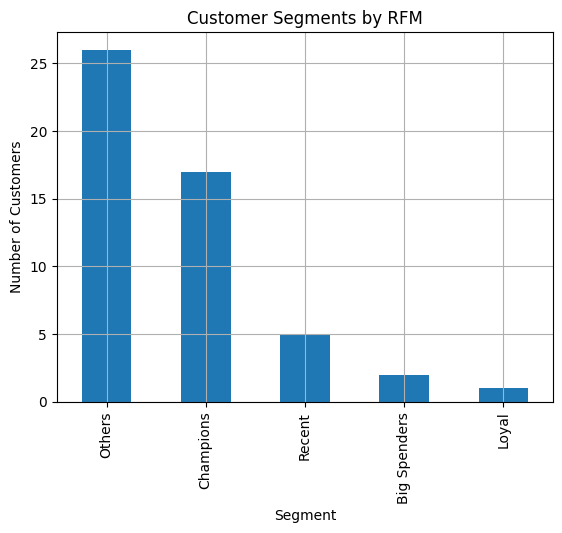

In [33]:
import matplotlib.pyplot as plt

rfm['segment'].value_counts().plot(kind='bar')
plt.title("Customer Segments by RFM")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()